# Problem Set 3: Exact Inference with Probabilistic Graphical Models

## Task 1(a) Draw the moral graph, triangulated graph and the junction tree.

In [83]:
# !pip install pgmpy

from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt

In [84]:
clinical_model = BayesianNetwork([('asia', 'tub'),
                                ('tub', 'either'),
                                ('smoke', 'lung'),
                                ('lung', 'either'),
                                ('smoke', 'bronc'),
                                ('bronc', 'dysp'),
                                ('either', 'dysp'),
                                ('either', 'xray')])

In [85]:
asia_cpd = TabularCPD(variable = 'asia', variable_card = 2, values = [[0.01], [0.99]])
smoke_cpd = TabularCPD(variable = 'smoke', variable_card = 2, values = [[0.5], [0.5]])
asia_tub_cpd = TabularCPD(variable = 'tub', variable_card = 2, values = [[0.05, 0.01],[0.95, 0.99]], evidence = ['asia'], evidence_card = [2])
smoke_lung_cpd = TabularCPD(variable = 'lung', variable_card = 2, values = [[0.1, 0.01],[0.9, 0.99]], evidence = ['smoke'], evidence_card = [2])
smoke_bronc_cpd = TabularCPD(variable = 'bronc', variable_card = 2, values = [[0.6, 0.3],[0.4, 0.7]], evidence = ['smoke'], evidence_card = [2])
either_xray_cpd = TabularCPD(variable = 'xray', variable_card = 2, values = [[0.98, 0.05],[0.02, 0.95]], evidence = ['either'], evidence_card = [2])
lung_tub_either_cpd = TabularCPD(variable = 'either', variable_card = 2, values = [[1, 1, 1, 0], [0, 0, 0, 1]], evidence = ['lung','tub'], evidence_card = [2, 2])
bronc_either_dysp = TabularCPD(variable='dysp', variable_card = 2,values=[[0.9, 0.7, 0.8, 0.1], [0.1, 0.3, 0.2, 0.9]], evidence = ['bronc', 'either'], evidence_card = [2, 2])

In [86]:
clinical_model.add_cpds(asia_cpd, smoke_cpd, asia_tub_cpd, smoke_lung_cpd, smoke_bronc_cpd, either_xray_cpd, lung_tub_either_cpd, bronc_either_dysp)

In [87]:
for cpd in clinical_model.get_cpds():
      print(cpd)

+---------+------+
| asia(0) | 0.01 |
+---------+------+
| asia(1) | 0.99 |
+---------+------+
+----------+-----+
| smoke(0) | 0.5 |
+----------+-----+
| smoke(1) | 0.5 |
+----------+-----+
+--------+---------+---------+
| asia   | asia(0) | asia(1) |
+--------+---------+---------+
| tub(0) | 0.05    | 0.01    |
+--------+---------+---------+
| tub(1) | 0.95    | 0.99    |
+--------+---------+---------+
+---------+----------+----------+
| smoke   | smoke(0) | smoke(1) |
+---------+----------+----------+
| lung(0) | 0.1      | 0.01     |
+---------+----------+----------+
| lung(1) | 0.9      | 0.99     |
+---------+----------+----------+
+----------+----------+----------+
| smoke    | smoke(0) | smoke(1) |
+----------+----------+----------+
| bronc(0) | 0.6      | 0.3      |
+----------+----------+----------+
| bronc(1) | 0.4      | 0.7      |
+----------+----------+----------+
+---------+-----------+-----------+
| either  | either(0) | either(1) |
+---------+-----------+-----------+
| 

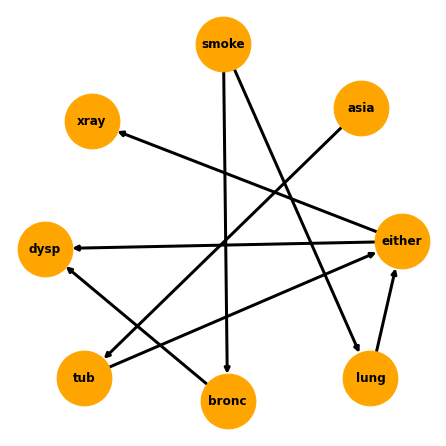

In [88]:
# Bayesian Network Model

options = {'node_color': 'orange', 'node_size': 3000,'width': 3, 'font_weight': 'bold'}
plt.figure(figsize=(6,6))
nx.draw(clinical_model, with_labels=True, **options )
plt.show()

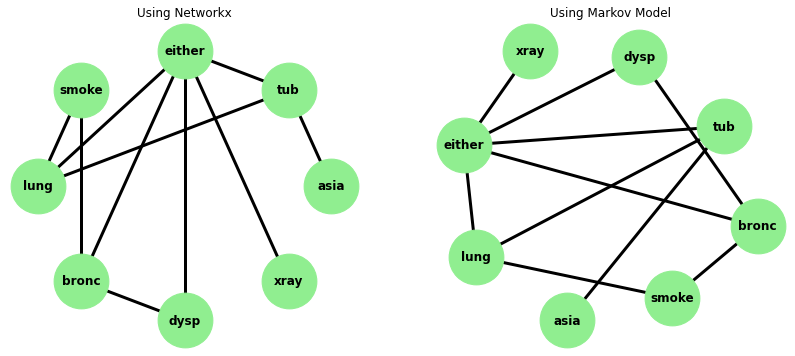

In [89]:
# Moral Graph

options = {'node_color': 'lightgreen', 'node_size': 3000,'width': 3, 'font_weight': 'bold'}
plt.figure(figsize=(14, 6))
moral1 = nx.moral_graph(clinical_model)
plt.subplot(1, 2, 1)
plt.title("Using Networkx")
nx.draw_circular(moral1, with_labels=True, **options )
moral = clinical_model.to_markov_model()
plt.subplot(1, 2, 2)
plt.title("Using Markov Model")
nx.draw(moral, with_labels=True, **options )
plt.show()

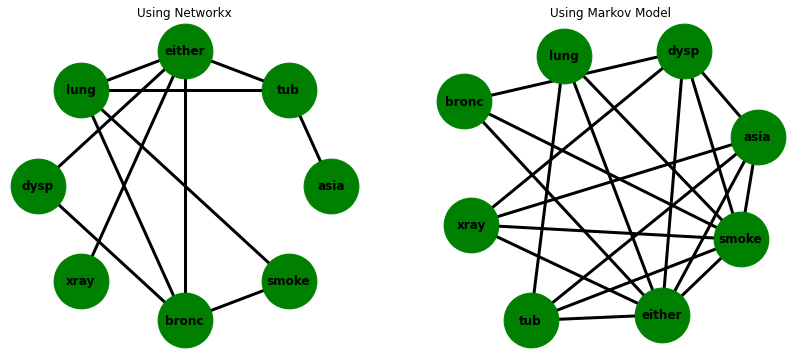

In [90]:
# Triangulated Graph

options = {'node_color': 'green', 'node_size': 3000,'width': 3, 'font_weight': 'bold'}
plt.figure(figsize=(14,6))
chordal1, _ = nx.complete_to_chordal_graph(moral)
plt.subplot(1, 2, 1)
plt.title("Using Networkx")
nx.draw_circular(chordal1, with_labels=True, **options )
chordal = moral.triangulate()
plt.subplot(1, 2, 2)
plt.title("Using Markov Model")
nx.draw(chordal, with_labels=True, **options )
plt.show()

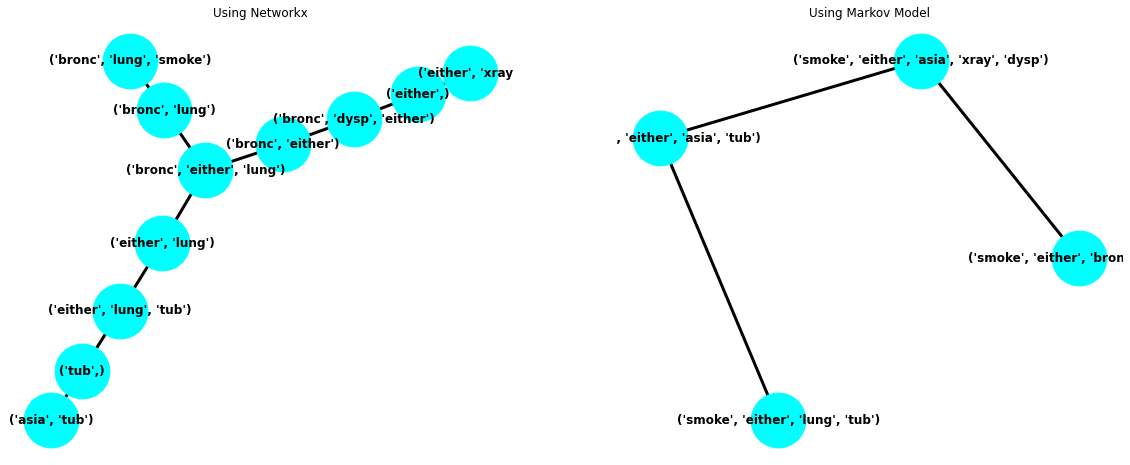

In [96]:
# Junction Tree

options = {'node_color': 'cyan', 'node_size': 3000,'width': 3, 'font_weight': 'bold'}
plt.figure(figsize=(20, 8))
junction1 = nx.junction_tree(chordal1)
plt.subplot(1, 2, 1)
plt.title("Using Networkx")
nx.draw(junction1, with_labels=True, **options )
junction = chordal.to_junction_tree()
plt.subplot(1, 2, 2)
plt.title("Using Markov Model")
nx.draw(junction, with_labels=True, **options )
plt.show()

## Task 1(b) Explain why the “running intersection property” is satisfied in your junction tree.

#### Def: Let T be a cluster tree over ${\Phi}$, with ${V_T}$ its vertices and ${E_T}$ its edges. T has the running intersection property if, whenever X ${\in}$ ${C_i}$ and X ${\in}$ ${C_j}$, then X is also in every cluster in the (unique) path in T between ${C_i}$ and ${C_j}$.

Some examples:
$
('asia','tub') \ {\cap} \ ('either','lung','tub') \ {\subseteq} \ ('tub') \\
('either','lung','tub') \ {\cap} \ ('bronc','either','lung') \ {\subseteq} \ ('either','lung') \\
('bronc','either','smoke') \ {\cap} \ ('bronc','either','lung') \ {\subseteq} \ ('bronc','lung') \\
('bronc','either','lung') \ {\cap} \ ('bronc','dysp','either') \ {\subseteq} \ ('bronc','either') \\
('either','xray') \ {\cap} \ ('bronc','either','lung') \ {\subseteq} \ ('either') $

## Task 2(a) Describe how the different terms on the right hand side of p(V) = p(a)p(t|a)p(s)p(l|s)p(b|s)p(e|t,l)p(d|e,b)p(x|e) are distributed among the different junction tree clusters.

#### Def: We first define Message Passing: A node v can send exactly one message to a neighbour w, and it may only be sent when v has received a message from each of its other neighbours.

$ p(V) = p(a) p(t|a) p(s) p(l|s) p(b|s) p(e|t,l) p(d|e,b) p(x|e) \\
  p(V) = {\dfrac{{\Psi(a)} {\Psi(t,a)} {\Psi(e,t,l)} {\Psi(s)} {\Psi(l,s)} {\Psi(b,s)} {\Psi(x,e)} {\Psi(d,b,e)}}{{\Psi(t)} {\Psi(e,l)} {\Psi(b,e)} {\Psi(e)} {\Psi(b,l)}}} $

<table style='text-align:center'>
    <tr>
        <th> Order </th>
        <th> Summation Term </th>
        <th> Message </th>
        <th> Factors Associated </th>
        <th> Node </th>
    </tr>
    <tr>
        <td> 1 </td>
        <td> $ \sum_{a} p(a)p(t|a) $</td>
        <td> $ \tau(t) $</td>
        <td> $ \phi(a)\phi(t,a) $ </td>
        <td> (t,a) </td>
    </tr>
    <tr>
        <td> 2 </td>
        <td> $ \sum_{t} p(e|t,l)\tau(t) $</td>
        <td> $ \tau(l,e) $</td>
        <td> $ \phi(e,t,l)\tau(t) $ </td>
        <td> (e,t,l) </td>
    </tr>
    <tr>
        <td> 3 </td>
        <td> $ \sum_{d} p(d|e,b) $</td>
        <td> $ \tau(e,b) $</td>
        <td> $ \phi(d,b,e) $ </td>
        <td> (d,b,e) </td>
    </tr>
    <tr>
        <td> 4 </td>
        <td> $ \sum_{e} p(x|e) $</td>
        <td> $ \tau(e) $</td>
        <td> $ \phi(x,e) $ </td>
        <td> (x,e) </td>
    </tr>
    <tr>
        <td> 5 </td>
        <td> $ \sum_{e} \tau(e) \tau(e,b) \tau(l,e) $</td>
        <td> $ \tau(b,l) $</td>
        <td> $ \tau(e) \tau(e,b) \tau(l,e) $ </td>
        <td> (l,s) </td>
    </tr>
    <tr>
        <td> 6 </td>
        <td> $ \sum_{s} p(s) p(l|s) p(b|s) $</td>
        <td> $ \tau(b,l) $</td>
        <td> $ \phi(s) \phi(l,s) \phi(b,s) $ </td>
        <td> (b,s) </td>
    </tr>
</table>

#### Write down the messages:
<table style='text-align:center'>
    <tr>
        <th> Bidirectional Message </th>
        <th> Messages </th>
        <th> Factors Associated </th>
    </tr>
    <tr>
        <td> (a,t) ${\leftrightarrow}$ (e,t,l) </td>
        <td> $ \tau(t) $</td>
        <td> $ \sum_{a} p(a)p(t|a) $</td>
    </tr>
    <tr>
        <td> (e,t,l) ${\leftrightarrow}$ (e,b,l) </td>
        <td> $ \tau(l,e) $</td>
        <td> $ \sum_{t} p(e|t,l)\tau(t) $</td>
    </tr>
       <tr>
        <td> (e,b,l) ${\leftrightarrow}$ (s,b,l) </td>
        <td> $ \tau(b,l) $</td>
        <td> $ \sum_{s}p(s)p(l|s)p(b|s) $</td>
    </tr>
    <tr>
        <td> (s,b,l) ${\leftrightarrow}$ (e,d,b) </td>
        <td> $ \tau(e,b) $</td>
        <td> $ \sum_{d} p(d|b,e) $</td>
    </tr>
    <tr>
        <td> (e,d,b) ${\leftrightarrow}$ (e,x) </td>
        <td> $ \tau(e) $</td>
        <td> $ \sum_{e} p(x|e) $</td>
    </tr>
</table>

## Task 2(b) Write out the messages using these terms and verify that the message passing algorithm indeed gives the cluster marginals.

#### The propagation algorithm works by turning the clique potential representation ${p(i_{v})}$ = ${\prod_{j=1}^T}{\Psi C_{j}}{i_{C_j}}$ into a representation in which each potential $ {\Psi C_{j}} $ is replaced by the marginal distribution ${p({i_{C_j}})}$. This representation is called a clique marginal representation. This is done by working twice through the set of cliques and passing ‘messages’ between neighbouring cliques: first from the last clique in the RIP-ordering towards the first, i.e. inwards in the junction tree, and subsequently passing messages in the other direction.

#### In detail, the process is as follows. We start with the last clique ${C_{T}}$ in the RIP ordering where ${C_{T}} = {S_{T}} \cup {R_{T}}$, ${C_{T}} = {S_{T}} \cap {R_{T}} = \phi$. The factorization ${p(i_{v})}$ = ${\prod_{j=1}^T}{\Psi C_{j}}{i_{C_j}}$ together with the factorization criterion ${f(x_{A},x_{B},x_{C}) = g(x_{A},x_{C}) h(x_{B},x_{C})}$ implies that ${R_{T} \amalg (C_{1} \cup \cdot \cdot \cdot \cup C_{T-1}) \backslash S_{T}}$. Marginalizing over ${i_{R_T}}$ gives:

#### $p(i_{C_{1}} \cup \cdot \cdot \cdot \cup C_{T-1}) = {(\prod_{j=1}^{T-1}}{\Psi C_{j}}{i_{C_j}){\sum_{i_{R_T}}{\Psi C_{T}}({i_{S_T}},{i_{R_T}})}}$

#### Let ${\Psi S_{T}}({i_{S_T}}) = {\sum_{i_{R_T}}{\Psi C_{T}}({i_{S_T}},{i_{R_T}})}$ Then from the above expression we have:

#### $p({i_{R_T}}|{i_{S_T}}) = {\Psi C_{T}}({i_{S_T}},{i_{R_T}})/{\Psi S_{T}}({i_{S_T}})$ and hence:

#### ${p(i_{v})} = {p(i_{C_{1}} \cup \cdot \cdot \cdot \cup C_{T-1})}{p({i_{R_T}}|{i_{S_T}})} = {(\prod_{j=1}^{T-1}}{\Psi C_{j}}{i_{C_j}){\sum_{i_{R_T}}{\Psi C_{T}}({i_{S_T}},{i_{R_T}})}} {\Psi C_{T}}({i_{S_T}},{i_{R_T}})/{\Psi S_{T}}({i_{S_T}})$

#### The RIP ordering ensures that ST is contained in the neighbour of ${C_{T}}$ in the junction tree (one of the cliques $C_{1} \cdot \cdot \cdot C_{T-1}$), say ${C_k}$. We can therefore absorb ${\Psi S_{T}}$ into ${\Psi C_{k}}$ by setting ${\Psi C_{k}}$ $({i_{C_k}})$ <- ${\Psi C_{k}}({i_{C_k}}){\Psi S_{T}}({i_{S_T}})$. We can think of the clique ${C_{T}}$ passing the message ${\Psi S_{T}}$ to its neighbour ${\Psi C_{k}}$ , making a note of this by changing its own potential to ${\Psi C}$ <- ${\Psi C}/{\Psi S}$ , and $C_{k}$ absorbing the message.

#### After this we now have $p(i_{C_{1}} \cup \cdot \cdot \cdot \cup C_{T-1})$ = ${\prod_{j=1}^{T-1}}{\Psi C_{j}}{i_{C_j}}$. We can then apply the same scheme to the part of the junction tree which has not yet been traversed. Continuing in this way until we reach the root of the junction tree yields:

#### ${p(i_{v})} = {p(i_{C_{1}})}{p({i_{R_2}}|{i_{S_2}})}{p({i_{R_3}}|{i_{S_3}})} \cdot \cdot \cdot {p({i_{R_T}}|{i_{S_T}})}$

#### where ${p(i_{C_{1}})}$ = ${\Psi C_{j}}{(i_{C_j})}/{\sum_{i_{C_{1}}}}{\Psi C_{j}}{(i_{C_j})}$. The resulting expression is called a set chain representation. Note that the root potential now yields the joint marginal distribution of its nodes.

#### For some purposes we do not need to proceed further and the set chain repre- sentation is fully satisfactory. However, if we wish to calculate marginals to other cliques than the root clique, we need a second passing of messages. This time we work from the root towards the leaves in the junction tree and send messages with a slight twist, in the sense that this time we do not change the potential in the sending clique. Rather we do as follows:

#### Suppose ${C_{1}}$ is the parent of ${C_{2}}$ in the rooted junction tree. Then we have that ${p(i_{S_{2}})}$ = ${\sum_{i_{C_{1}\S_{2}}}}{p(i_{C_{1}})}$ and so:

#### ${p(i_{v})} = {p(i_{C_{1}})} {\frac{p({i_{C_2}})}{p({i_{S_2}})}} {p({i_{R_3}}|{i_{S_3}})} \cdot \cdot \cdot {p({i_{R_T}}|{i_{S_T}})}$

#### Thus when the clique ${C_{2}}$ has absorbed its message by the operation: ${\Psi C_{2}}{(i_{C_2})}$ <- ${\Psi C_{2}}{(i_{C_2})}{p(i_{S_{2}})}$

#### its potential is equal to the marginal distribution of its nodes. Proceeding in this way until we reach the leaves of the junction tree yields the clique marginal representation

#### ${p(i_{v})} = {\prod_{j=1}^{T-1}}P({i_{C_j}}) / {\prod_{j=2}^{T}}P({i_{S_j}})$

In [102]:
# Reference: https://esl.hohoweiya.xyz/references/Graphical-Models-with-R.pdf Page 59

## Task 2(c) Use message-passing algorithm to find the joint probability of “tub=yes, lung=yes,bronc=yes”, given evidence that “asia=yes, xray=yes”.

In [97]:
from pgmpy.inference import VariableElimination
# !pip install ipywidgets

In [98]:
model_inference = VariableElimination(clinical_model)
query = model_inference.query(variables=['tub', 'lung', 'bronc'], evidence={'asia': 0, 'xray': 0}, joint= True)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [99]:
print(str(query))

+--------+---------+----------+-----------------------+
| tub    | lung    | bronc    |   phi(tub,lung,bronc) |
+========+=========+==========+=======================+
| tub(0) | lung(0) | bronc(0) |                0.0106 |
+--------+---------+----------+-----------------------+
| tub(0) | lung(0) | bronc(1) |                0.0079 |
+--------+---------+----------+-----------------------+
| tub(0) | lung(1) | bronc(0) |                0.1413 |
+--------+---------+----------+-----------------------+
| tub(0) | lung(1) | bronc(1) |                0.1778 |
+--------+---------+----------+-----------------------+
| tub(1) | lung(0) | bronc(0) |                0.2021 |
+--------+---------+----------+-----------------------+
| tub(1) | lung(0) | bronc(1) |                0.1508 |
+--------+---------+----------+-----------------------+
| tub(1) | lung(1) | bronc(0) |                0.1370 |
+--------+---------+----------+-----------------------+
| tub(1) | lung(1) | bronc(1) |                0

#### The joint probability of "tub = yes, lung = yes, bronc = yes" given the evidence that "asia = yes, xray = yes" is 0.0106

## Task 3) Find the joint probability with MCMC (Markov Chain Monte Carlo)

In [100]:
from pgmpy.sampling import HamiltonianMC, LeapFrog, GradLogPDFGaussian
import numpy as np

In [101]:
sampler = HamiltonianMC(model = clinical_model, grad_log_pdf = GradLogPDFGaussian, simulate_dynamics = LeapFrog)

#### References:
#### https://www.cs.toronto.edu/~urtasun/courses/GraphicalModels/lecture11.pdf
#### https://www.oreilly.com/library/view/mastering-probabilistic-graphical/9781784394684/
#### https://www.cs.helsinki.fi/u/bmmalone/probabilistic-models-spring-2014/JunctionTreeBarber.pdf
#### https://pgmpy.org/detailed_notebooks/8.%20Sampling%20Algorithms.html
#### https://esl.hohoweiya.xyz/references/Graphical-Models-with-R.pdf